In [1]:
from fft import *
import matplotlib.pyplot as plt

## Test 1: FFT and IFFT Correctness

Generate a random signal of arbitrary length, compute its FFT and then its IFFT, and verify that the recovered signal is close to the original.

In [2]:
x = np.random.random(10) + 1j * np.random.random(10)
X = FFT1D(x)
x_rec = IFFT1D(X)
print('Original signal:', x)
print('Recovered signal:', x_rec)
print('FFT/IFFT recovery successful:', arrays_almost_equal(x, x_rec))

Original signal: [0.03302098+0.11962098j 0.72484055+0.45387877j 0.67717413+0.33055678j
 0.6682988 +0.82068168j 0.57384567+0.210065j   0.19859973+0.03685366j
 0.8447556 +0.04441575j 0.91690069+0.60723794j 0.99530575+0.39992947j
 0.80962405+0.66170758j]
Recovered signal: [0.03302098+0.11962098j 0.72484055+0.45387877j 0.67717413+0.33055678j
 0.6682988 +0.82068168j 0.57384567+0.210065j   0.19859973+0.03685366j
 0.8447556 +0.04441575j 0.91690069+0.60723794j 0.99530575+0.39992947j
 0.80962405+0.66170758j]
FFT/IFFT recovery successful: True


## Test 2: Convolution and Multiplication Relationship

For two signals `x` and `h`, the convolution computed directly in the time domain should equal the result obtained by:

1. Computing the FFT of both signals
2. Multiplying the resulting spectra element-wise
3. Applying the IFFT to the product.

I perform both computations and compare the results.

In [3]:
signal_length = 64
filter_length = 8
signal = np.random.random(signal_length) + 1j * np.random.random(signal_length)
filter = np.random.random(filter_length) + 1j * np.random.random(filter_length)

y_direct = linear_convolution_direct(signal, filter)
print(y_direct.shape)
y_fft = linear_convolution_fft(signal, filter)

print('\nDirect linear convolution:', y_direct)
print('\nFFT-based linear convolution:', y_fft)
print('\nConvolution and multiplication relationship holds:', arrays_almost_equal(y_direct, y_fft))

(71,)

Direct linear convolution: [ 0.24749877+1.02126661j  0.27366603+1.09056787j  0.1298147 +1.67174425j
 -0.03082975+1.91861055j -0.64546239+2.85570992j -0.79388919+2.83251852j
 -1.50594609+3.19601297j -1.71155592+4.09064799j -1.53784375+3.63870186j
 -1.95315656+3.18129609j -1.33810612+3.71553794j -1.67877577+3.91072742j
 -0.5951893 +3.63422559j -1.3756638 +3.29307739j -0.16663919+3.99855678j
 -0.36778343+3.24475819j  0.83143046+3.81612907j  0.20111912+3.53481438j
  0.35606225+4.09950399j  0.26913234+3.41271077j  0.78157543+3.93355252j
  0.75536175+3.5375105j   0.23526138+4.1254842j   0.31816263+3.83357979j
 -0.81404633+4.48022693j  0.417685  +4.35186625j -0.96884351+3.87813613j
 -0.42260401+5.17845538j -0.01849832+4.44640466j -0.72467436+5.06236576j
 -0.37166586+5.24312085j -0.40594814+5.45501987j  0.00717599+4.51502014j
 -0.19279501+5.88522668j -0.28325551+4.96070426j -0.5969086 +4.97528296j
 -0.38047559+4.98969626j -0.50615148+5.81585344j -0.44517934+5.06354106j
 -0.22308035+5.15

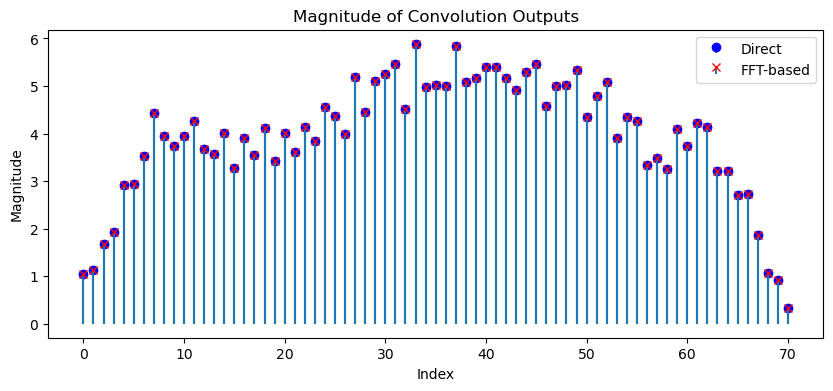

In [4]:
plt.figure(figsize=(10, 4))
plt.stem(np.abs(y_direct), markerfmt='bo', basefmt=" ", label='Direct')
plt.stem(np.abs(y_fft), markerfmt='rx', basefmt=" ", label='FFT-based')
plt.title('Magnitude of Convolution Outputs')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
plt.show()